In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\BARTEK\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ndvi_spring = "t2_ndvi2024May.tif"
ndvi_summer = "t2_ndvi2023_Jul_Aug.tif"
temp_spring = "t2_lst2024May.tif"
temp_summer = "t2_lst2023_Jul_Aug.tif"

In [3]:
def read_tif(filepath):
    with rasterio.open(filepath) as dataset:
        return dataset.read(1)

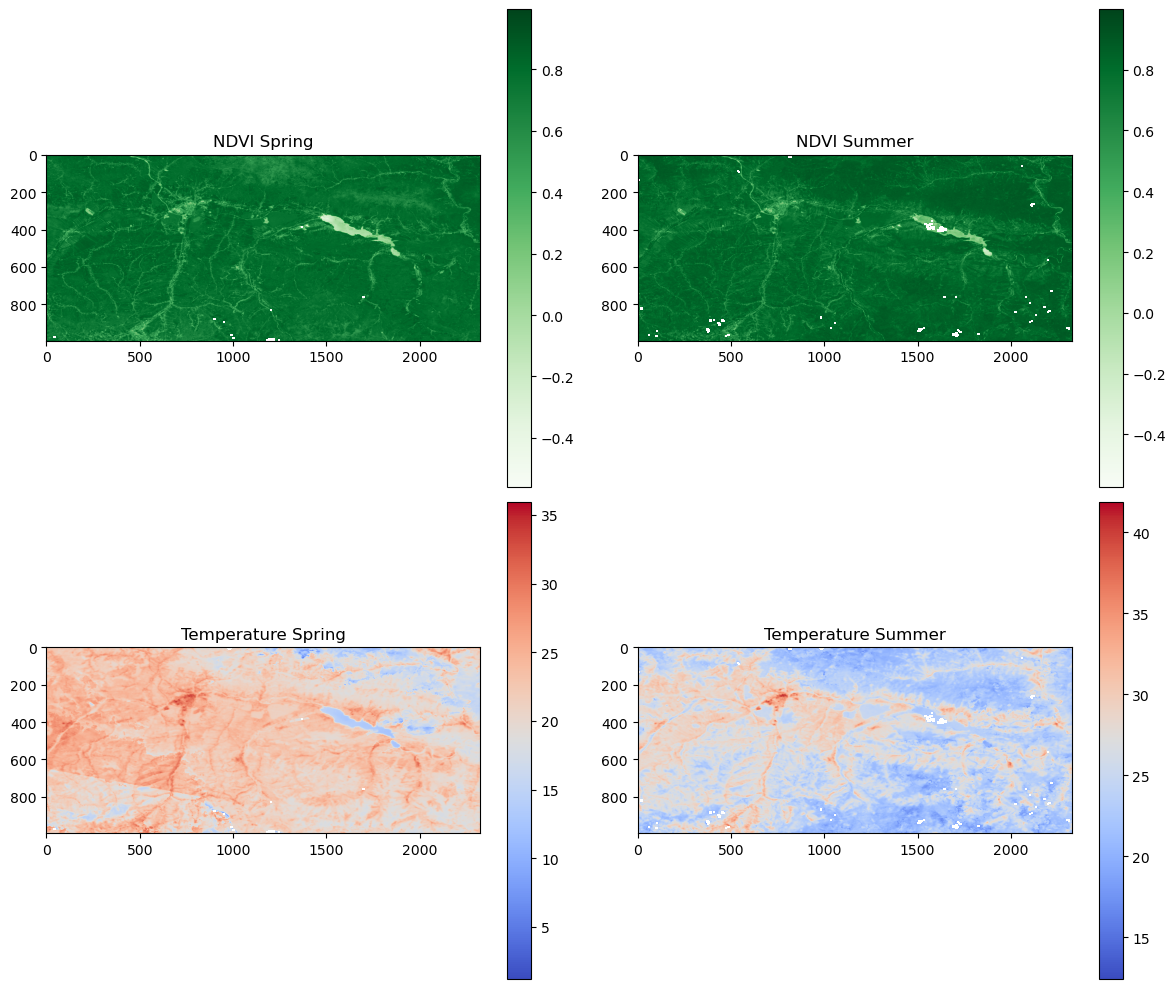

In [4]:
ndvi_spring = read_tif(ndvi_spring)
ndvi_summer = read_tif(ndvi_summer)
temp_spring = read_tif(temp_spring)
temp_summer = read_tif(temp_summer)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
images = [
    (ndvi_spring, "NDVI Spring", "Greens"),
    (ndvi_summer, "NDVI Summer", "Greens"),
    (temp_spring, "Temperature Spring", "coolwarm"),
    (temp_summer, "Temperature Summer", "coolwarm")
]
for ax, (data, title, cmap) in zip(axes.flat, images):
    img = ax.imshow(data, cmap=cmap)
    ax.set_title(title)
    fig.colorbar(img, ax=ax)

plt.tight_layout()
plt.show()


c:\Users\BARTEK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BARTEK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BARTEK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BARTEK\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

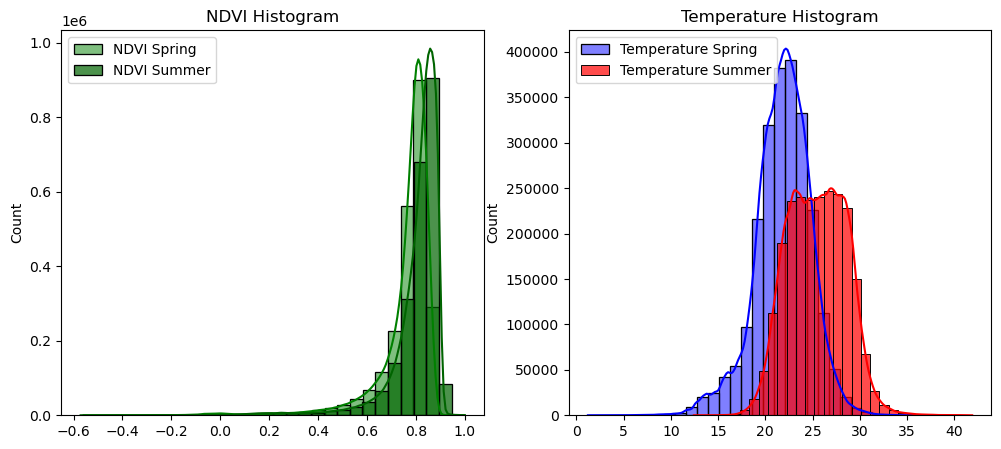

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(ndvi_spring.flatten(), bins=30, kde=True, ax=ax[0], color='green', label='NDVI Spring')
sns.histplot(ndvi_summer.flatten(), bins=30, kde=True, ax=ax[0], color='darkgreen', alpha=0.7, label='NDVI Summer')
ax[0].set_title('NDVI Histogram')
ax[0].legend()

sns.histplot(temp_spring.flatten(), bins=30, kde=True, ax=ax[1], color='blue', label='Temperature Spring')
sns.histplot(temp_summer.flatten(), bins=30, kde=True, ax=ax[1], color='red', alpha=0.7, label='Temperature Summer')
ax[1].set_title('Temperature Histogram')
ax[1].legend()

plt.show()


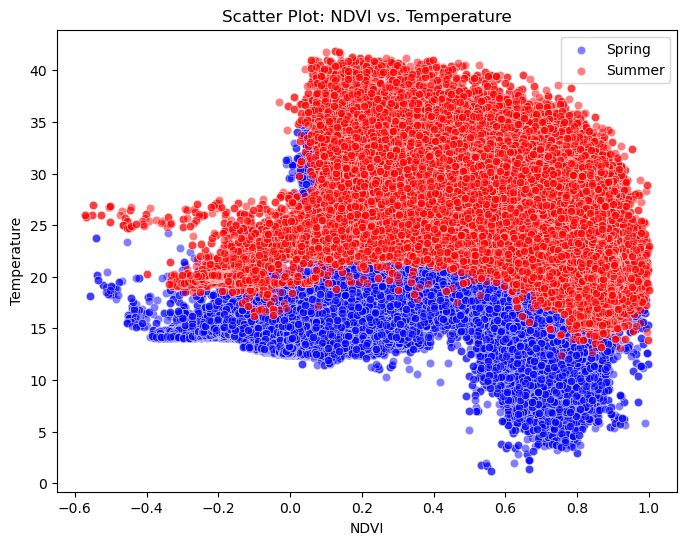

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ndvi_spring.flatten(), y=temp_spring.flatten(), color='blue', alpha=0.5, label='Spring')
sns.scatterplot(x=ndvi_summer.flatten(), y=temp_summer.flatten(), color='red', alpha=0.5, label='Summer')
plt.xlabel('NDVI')
plt.ylabel('Temperature')
plt.title('Scatter Plot: NDVI vs. Temperature')
plt.legend()
plt.show()